**故障轴承的模型建立与信号生成**

&ensp;&ensp;&ensp; **建立一个五自由度轴承动力学模型，为后续信号分析和方程提取做准备。**<br>
# 利用五自由度模型生成故障情况下的轴承响应动力学模型推导 <br>
## 五自由度模型的构建<br>
&ensp;&ensp;&ensp; 五自由度模型的建立根据论文[[1]](#link_ref1)中描述得到，其中包含轴承中外圈$x_p,y_p$、内圈$x_s,y_s$两个正交方向共4个自由度，以及传感器所在位置$y_b$的第五个自由度构成，具体视图如下所示：<br>
>![fig1](./bearing5-DOF.png)

&ensp;&ensp;&ensp;  因此，可以得到五自由度模型的五个动力学微分方程：<a id = "link_function1"></a><br>

\begin{align}
    m_s { \ddot x_s }  + k_s (x_s)+f_x((x_s-x_p),\omega_s,dt) = 0 \tag{1}\label{YY}\\
    m_s { \ddot y_s }  + k_s (y_s)+f_y ((y_s-y_p),\omega_s,dt) = 0 \tag{2}\\
    m_p { \ddot x_p } + c_p { \dot x_p }+ k_p (x_p) - f_x ((x_s-x_p),\omega_s,dt) = 0 \tag{3}\\
    m_p { \ddot y_p } + (c_p+c_r) { \dot y_p }+ (k_p+k_r) (y_p) - k_r y_b-f_y( (y_s-y_p),\omega_s,dt) = 0 \tag{4}\\
    m_r { \ddot y_b }  + k_s (y_b - y_p)+c_r({ \dot y_b }-{ \dot y_p }) = 0 \tag{5}
\end{align}<br>

其中，方程$f_x (\bullet,\omega_s,dt)$用于描述各个转子在接触位置所计算得到的接触力的总和，同样是分为$x,y$两个方向：<a id = "link_function6"></a><br>

\begin{align}
    f_x = k_b \sum_{j=1}^{n_{b}}\gamma_{j} \delta_{j}^{1.5} cos\phi_{j}    \tag{6}\label{WW}\\
    f_y = k_b \sum_{j=1}^{n_b}\gamma_{j} \delta_{j}^{1.5} sin\phi_{j}      \tag{7}\label{WX}
\end{align}
<br>
公式\eqref{WW}\eqref{WX}中，$k_b$为载荷影响因子，取决于材料表面的接触集合形状以及塑性接触变形的形式；$\gamma_{j}$为条件运算，即当$\delta_{j}>0$时，$\gamma_{j}=1$，否则$\gamma_{j}=0$；同时，$\delta_{j}^{1.5}$中1.5次方仅针对球轴承的形式；$\phi_{j}$代表了当前转子的位置，其方程可以表示为：<a id = "link_function8"></a><br>
\begin{equation}
    \phi_{j} = \frac{2\pi(j-1)}{n_{b}}+\omega_c dt + \phi_{0}  \tag{8}\label{WXY}
\end{equation}<br>
$\omega_c$为保持架的转速，其通常可以直接通过轴的专属$\omega_s$换算得到：$ \omega_c = \frac{(D_p-D_b)\omega_s}{2D_p}$
<br>
<br>

>![fig2](./bearing_half.png)

&ensp;&ensp;&ensp; $\delta_{j}$代表两个接触表面之间的干涉，其主要受到三个因素的影响：<br>
&ensp;&ensp;&ensp; * 轴承座的位置<br>
&ensp;&ensp;&ensp; * 故障区域的位置分布情况<br>
&ensp;&ensp;&ensp; * 滚动元件的滑动<br>
&ensp;&ensp;&ensp; 因此需要在建立干涉的方程表达的时候，需要考虑到以上三个因素：<a id = "link_function9"></a><br>
\begin{equation}
    \delta_{j} = (x_s-x_p)cos\phi_{j}+(y_s-y_p)sin\phi_{j}-c-\beta_j C_d  \tag{9}\label{WXYZ}
\end{equation}<br>
$\phi_{0}$代表保持架的初始位置；$c,C_d$分别为滚子与滚道外表面的间隙和故障区域的深度。同样，考虑到滑动的影响，公式\eqref{WXY}重建为：$$\phi_{j} = \frac{2\pi(j-1)}{n_{b}}+\omega_c dt + \phi_{0}+(0.5-rand)\phi_{slip}$$<br>
相位偏差$\phi_{slip}$可以用$\triangle f =  \phi_{slip}f_m$表示，$f_m$为调制频率（轴的旋转频率），$\triangle f$为滑动频率，其大致为百分之1-2的调制频率。
## 故障模型表征方法<br>
&ensp;&ensp;&ensp; 故障模型的表征主要通过修改公式\eqref{WXYZ}中的$\beta_j$项来完成故障模型的建模，本节中暂时只考虑局部故障，先不考虑扩展剥落的表征。
### 内外圈的故障表征方法<br>
&ensp;&ensp;&ensp; 对于内圈和外圈故障，可以使用一个简单的分段函数来模拟轴承的滚动元件进入故障区域的情况：<a id = "link_function10"></a><br>
\begin{equation}
    \beta_j =
    \begin{cases}
        1,  & \text{if $\phi_d< \phi_j<\phi_d+\triangle\phi_d$} \\
        0, & \text{Otherwise}
    \end{cases}  
    \tag{10}
\end{equation}<br>
>![fig2](./bearing_fault.png)

&ensp;&ensp;&ensp;对于外圈故障，$\phi_d$为一个固定值，而对于内圈故障，$\phi_d$可以通过$\phi_d=\omega_s t +\phi_{do}$构建。<br>
### 滚动元件的故障表征方法<br>
&ensp;&ensp;&ensp; 为了对滚动元件的局部故障进行完整的建模，对新模型进行了更新，以模拟滚动构件中的故障。其中一个滚动元件(滚动元件k)上的局部故障区域以与滚动元件相同的速度旋转，即spin(球旋转频率)，其定义为：<br>
\begin{equation}
    \omega_{spin} = \frac{\omega_{s}D_p}{2D_b}(1-(\frac{D_b}{D_p}cos\alpha)^2)  \tag{11}
\end{equation}
<br>
&ensp;&ensp;&ensp;对于局部故障的位置$\phi_{s}$需要通过$\phi_{s}=\omega_{spin} t =\phi_{do}$来进行定义，其中$\phi_{do}$是局部故障的初始位置。<br>
&ensp;&ensp;&ensp;由于轴承内外圈的接触表面曲率有所不同，所以内外圈的接触时间和深度也不同，因此干涉接触可以表示为：<br>
\begin{equation}
    \beta_j =
    \begin{cases}
        0,  & \text{if j$\neq$k} \\
        1, & \text{if $0< \phi_s<0+\triangle\phi_o$}\\
        \frac{C_{dr}+C_{di}}{C_{dr}-C_{do}},  & \text{if $\pi< \phi_s<\pi+\triangle\phi_i$} \\
        0, & \text{Otherwise}
    \end{cases}  
    \tag{12}
\end{equation}<br>
其中$C_{di}=r_i-\sqrt{r_i^2-x^2}$,$C_{dr}=\frac{D_b}{2}-\sqrt{(\frac{D_b}{2})^2-x^2}$,$r_o=\frac{D_p+D_b}{2}$(外圈半径),$C_{do}=r_o-\sqrt{r_o^2-x^2}$。<br>
&ensp;&ensp;&ensp;故障的角度宽度也将取决于故障位置的宽度：<br>


\begin{align}
    \triangle\phi_{do} = \frac{2x}{r_o}  (rad)  \tag{13}\\
    \triangle\phi_{di} = \frac{2x}{r_i}  (rad) \tag{14}
\end{align}<br>

>![fig3](./ball_fault.png)

# 2.基于动力学模型的信号生成<br>
&ensp;&ensp;&ensp;使用符号功能计算库Sympy进行计算模拟。

In [1]:
import sympy as sp
from IPython.display import display, Latex
sp.init_printing(use_unicode=True)

## 五自由度模型的轴承外圈故障符号函数构建<br>
&ensp;&ensp;&ensp;在对五个方程直接进行符号函数的构建前，按照前述公式[(10)](#link_function10)构建内外圈故障下的干涉方程。对于外圈故障，$\phi_d$为一个固定值，暂时选定为0。<br>
&ensp;&ensp;&ensp;进一步构建公式[(8)](#link_function8)中所描述的滚子的位置方程。

In [2]:
j,n_b,omega_c,d_t,D_p,D_b,omega_s,phi_j,phi_silp,rand= sp.symbols('j n_b omega_c dt D_p D_b omega_s phi_j phi_silp rand')
phi_d,phi_j,phi_jsub = sp.symbols('phi_d phi_j phi_jsub')
omega_c = (D_p-D_b)*omega_s/(2*D_p)
phi_j = (sp.pi*(j-1))/n_b + omega_c*d_t +phi_d +(0.5-rand)*phi_silp
display(Latex(f"$$ \\phi_j=  {sp.latex(phi_j)}$$"))

<IPython.core.display.Latex object>

In [3]:
#phi_d = 0
beta_j = sp.Piecewise(
                (1,((phi_d<phi_j)&(phi_j<(phi_d+phi_jsub)))),
                (0,True)
                )
display(Latex(f"$$ \\beta_j = {sp.latex(beta_j)}$$"))

<IPython.core.display.Latex object>

&ensp;&ensp;&ensp;进一步构建公式[(9)](#link_function9)的干涉方程，建模过程中轴承中外圈$x_p,y_p$、内圈$x_s,y_s$两个正交方向共4个自由度被定义创建，$c,C_d$同样也被直接创建。

In [4]:
t,c,C_d= sp.symbols('t c C_d')
x_s=sp.Function('x_s')(t)
x_p=sp.Function('x_p')(t)
y_s=sp.Function('y_s')(t)
y_p=sp.Function('y_p')(t)
delta_j = (x_s-x_p)*sp.cos(phi_j)+(y_s-y_p)*sp.sin(phi_j)-c-beta_j*C_d
display(Latex(f"$$ \\delta_j =  {sp.latex(delta_j)}$$"))

<IPython.core.display.Latex object>

&ensp;&ensp;&ensp;构建公式[(6,7)](#link_function6)受力方程，同样是在x,y两个正交方向进行总受力的分析。

In [5]:
gamma_j = sp.Piecewise(
                (1,delta_j>0),
                (0,True)
                )
display(Latex(f"$$ \\gamma_j=  {sp.latex(gamma_j)}$$"))

<IPython.core.display.Latex object>

In [6]:
f_gamma_delta_j = gamma_j*delta_j**(1.5)
display(Latex(f"$$   {sp.latex(f_gamma_delta_j)}$$"))

<IPython.core.display.Latex object>

In [7]:
k_b= sp.symbols('k_b')
f_x = k_b*sp.summation(f_gamma_delta_j*sp.cos(phi_j),(j,1,n_b))
display(Latex(f"$$ \f_x =  {sp.latex(f_x)}$$"))

<IPython.core.display.Latex object>

In [8]:
f_y = k_b*sp.summation(f_gamma_delta_j*sp.sin(phi_j),(j,1,n_b))
display(Latex(f"$$ \f_y =  {sp.latex(f_y)}$$"))

<IPython.core.display.Latex object>

&ensp;&ensp;&ensp;公式[(1-5)](#link_function1)可以被构建为如下的形式。

In [9]:
k_s,k_p,k_r,c_p,c_r,m_s,m_p,m_r= sp.symbols('k_s k_p k_r c_p c_r m_s m_p m_r')
EQ1 = sp.Eq(m_s*x_s.diff(t,t)+k_s*x_s+f_x,0)
display(Latex(f"$$    {sp.latex(EQ1)}$$"))

<IPython.core.display.Latex object>

In [10]:
EQ2 = sp.Eq(m_s*y_s.diff(t,t)+k_s*y_s+f_y,0)
display(Latex(f"$$    {sp.latex(EQ2)}$$"))

<IPython.core.display.Latex object>

In [11]:
EQ3 = sp.Eq(m_p*x_p.diff(t,t)+c_p*x_p.diff(t)+k_p*x_p-f_x,0)
display(Latex(f"$$    {sp.latex(EQ3)}$$"))

<IPython.core.display.Latex object>

In [12]:
y_b=sp.Function('y_b')(t)
EQ4 = sp.Eq(m_p*y_p.diff(t,t)+(c_p+c_r)*y_p.diff(t)+(k_r+k_p)*y_p-k_r*y_b-f_y,0)
display(Latex(f"$$    {sp.latex(EQ4)}$$"))

<IPython.core.display.Latex object>

In [13]:
EQ5 = sp.Eq(m_r*y_b.diff(t,t)+c_r*(y_b.diff(t)-y_p.diff(t))+k_s*(y_b-y_p),0)
display(Latex(f"$$    {sp.latex(EQ5)}$$"))

<IPython.core.display.Latex object>

## 五自由度模型的轴承外圈故障参数导入与求解<br>
&ensp;&ensp;&ensp;第一步，确定除变量以外的所有参数。<br>
&ensp;&ensp;&ensp;$m_p = 12.638(kg)$,     $k_p = 1.51056\times10^7(N/m)$, $c_p = 2210.7(Ns/m)$,<br>
&ensp;&ensp;&ensp;$m_r = 1.0000(kg)$,     $k_r = 8.88260\times10^9(N/m)$, $c_r = 9424.8(Ns/m)$,<br>
&ensp;&ensp;&ensp;$m_s=0.5134(kg)$,       $k_s = 4.24100\times10^4(N/m)$, $c_s = 877.60(Ns/m)$,<br>
&ensp;&ensp;&ensp;$n_b=9$&ensp;,$\alpha = 0(rad)$,$k_b = 1.8978\times10^{10}(N/m^{1.5})$,$\omega_s = 20\pi(rad)$,<br>
&ensp;&ensp;&ensp;$dt = 1/25600(s)$,$\phi_{slip} = 0$,$C_d = 1.91\times10^{-5}(m)$,$rand = 0 $,<br>
&ensp;&ensp;&ensp;$\phi_{d}=0(rad)$,$\triangle\phi_{d}=0.0192(rad)$ ,$D_b = 7.94\times10^{-3}(m)$,$D_p = 39.04\times10^{-3}(m)$,<br>
&ensp;&ensp;&ensp;将变量带入重构函数。


In [1]:
import sympy as sp
from IPython.display import display, Latex
import math
sp.init_printing(use_unicode=True)

In [2]:
j,n_b,omega_c,d_t,D_p,D_b,omega_s,phi_j,phi_silp,rand= sp.symbols('j n_b omega_c dt D_p D_b omega_s phi_j phi_silp rand')
phi_d,phi_j,phi_jsub,t = sp.symbols('phi_d phi_j phi_jsub t')
omega_c = (D_p-D_b)*omega_s/(2*D_p)
phi_j = (3.1415926*(j-1))/n_b + omega_c*t +phi_d +(0.5-rand)*phi_silp
phi_j_s = phi_j.subs([(phi_d , 0),(phi_silp , 0),(rand , 0),(n_b,9),(D_p,39.04*10**(-3)),(D_b,7.94*10**(-3)),(omega_s,20*3.1415926)])
Latex(f"$$ \\phi_j=  {sp.latex(phi_j_s)}$$")

<IPython.core.display.Latex object>

In [3]:
beta_j = sp.Piecewise(
                (1,((phi_d<phi_j_s)&(phi_j_s<(phi_d+phi_jsub)))),
                (0,True)
                )
beta_j_s = beta_j.subs([(phi_d , 0),(phi_jsub , 0.0192)])
display(Latex(f"$$ \\beta_j = {sp.latex(beta_j_s)}$$"))

<IPython.core.display.Latex object>

In [4]:
c,C_d,x_s,x_p,y_s,y_p = sp.symbols('c C_d x_s x_p y_s y_p')
delta_j   = (x_s-x_p)*sp.cos(phi_j_s)+(y_s-y_p)*sp.sin(phi_j_s)-c-beta_j_s*C_d
delta_j_s = delta_j.subs([(c,5*10**(-6)),(C_d,5*10**(-4))])
display(Latex(f"$$ \\delta_j =  {sp.latex(delta_j_s)}$$"))

<IPython.core.display.Latex object>

In [5]:
f_gamma_delta_j_s = sp.Piecewise(
                (delta_j_s**(1.5),delta_j_s>0),
                (0,True)
                )
display(Latex(f"$$ \\gamma_j=  {sp.latex(f_gamma_delta_j_s)}$$"))

<IPython.core.display.Latex object>

In [6]:
k_b= 1.8978*10**10
f_x = k_b*sp.summation(f_gamma_delta_j_s*sp.cos(phi_j_s),(j,1,n_b))
f_x_s = f_x.subs([(n_b,9)])
display(Latex(f"$$ F_x =  {sp.latex(f_x_s )}$$"))

<IPython.core.display.Latex object>

In [7]:
f_y = k_b*sp.summation(f_gamma_delta_j_s*sp.sin(phi_j_s),(j,1,n_b))
f_y_s = f_y.subs([(n_b,9)])
display(Latex(f"$$ F_y =  {sp.latex(f_y_s)}$$"))
f_delta_j = sp.lambdify([x_p,y_p,x_s,y_s,j,t],delta_j_s)
f_phi_j_s = sp.lambdify([j,t],phi_j_s)

<IPython.core.display.Latex object>

## 数值求解

微分方程的形式非常复杂，故而退而求其次，选择数值解。从julia中导入数值解求解方法DifferentialEquations

In [8]:
import diffeqpy as de
from diffeqpy import de
import numpy
from julia import Main
from julia import DifferentialEquations
from julia import Sundials
import matplotlib.pyplot as plt

&ensp;&ensp;&ensp;按照前述公式[(1-5)](#link_function1)，构建完全体微分方程，并且二阶导数以一阶导数联合方程形式表述：<br>
&ensp;&ensp;&ensp;符号对应关系为：<br>&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;$x_s\rightarrow {u[0]} $,$y_s\rightarrow {u[1]} $,$x_p\rightarrow {u[2]} $,$y_p\rightarrow {u[3]} $,$y_b\rightarrow {u[4]} $<br>
&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;${ \dot x_s }\rightarrow {u[5]} $,${ \dot y_s }\rightarrow {u[6]} $,${ \dot x_p }\rightarrow {u[7]} $,${ \dot y_p }\rightarrow {u[8]} $,${ \dot y_b }\rightarrow {u[9]} $<br>

In [9]:
def Fault_bearing(du,u,p,t):
    k_s,k_p,k_r,c_p,c_r,m_s,m_p,m_r = [4.24100*10**4,1.51056*10**7,8.88260*10**9,2210.7,9424.8,0.5134,12.638,1.0000]
    du[0] = u[5]  
    du[1] = u[6] 
    du[2] = u[7] 
    du[3] = u[8]
    du[4] = u[9]
    du[5] = (-k_s*u[0] - p(u,t,True))/m_s
    du[6] = (-k_s*u[1] - p(u,t,False))/m_s
    du[7] = (-k_p*u[2] - c_p*u[7] + p(u,t,True))/m_p
    du[8] = (-(k_p+k_r)*u[3] - (c_p+c_r)*u[8] + p(u,t,False) + k_r*u[4])/m_p
    du[9] = (-k_s*(u[4]-u[3]) - c_r*(u[9]-u[8]) )/m_r

&ensp;&ensp;&ensp;将作用力函数F引入。

In [10]:
def F(u,t,flag):
    n_b = 9
    x_s = u[0]
    y_s = u[1]
    x_p = u[2]
    y_p = u[3]
    f_sum = 0
    for i in range(n_b):
        delta_i = f_delta_j(x_p,y_p,x_s,y_s,i,t)
        phi_i = f_phi_j_s(i,t)
        if flag == True:
            if delta_i > 0:
                f_sum = delta_i**(1.5)*math.cos(phi_i)
        else:
            if delta_i > 0:
                f_sum = delta_i**(1.5)*math.sin(phi_i)
    return 1.8978*10**10*f_sum

&ensp;&ensp;&ensp;对初始值进行设定，初步设定初始值均为0。

In [11]:
u_0 = [0.0001,-0.0001,-0.0001,0.0001,0.0,0.0,0.0,0.0,0.0,0.0]
tspan = [0.0,1.0]
prob = DifferentialEquations.ODEProblem(Fault_bearing,u_0,tspan,F)
sol = DifferentialEquations.solve(prob)

加速度信号的全局模拟视图为：

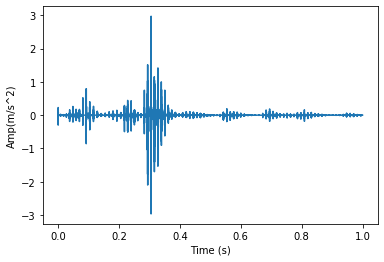

In [37]:
t = numpy.array(sol.t)
v_b = numpy.array(sol.u)[:,9].copy()
a_b = numpy.gradient(v_b)
plt.plot(t,a_b)
plt.xlabel('Time (s)'), plt.ylabel('Amp(m/s^2)')
plt.show()

加速度信号的全局局部视图为,两次冲激脉冲的时间间隔约为0.012s，其对应BPFO为81Hz，仿真信号结果真实度较高：

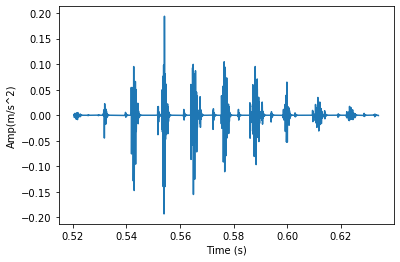

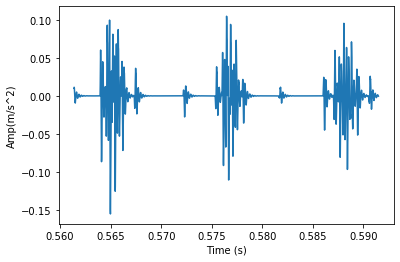

In [38]:
plt.plot(t[27000:33000],a_b[27000:33000])
plt.xlabel('Time (s)'), plt.ylabel('Amp(m/s^2)')
plt.show()
plt.plot(t[29000:31000],a_b[29000:31000])
plt.xlabel('Time (s)'), plt.ylabel('Amp(m/s^2)')
plt.show()

加速度信号的频谱图为,同样在BPFO倍频初有峰值：

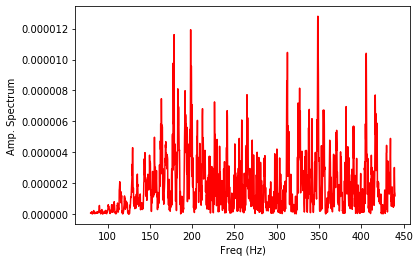

In [47]:
from numpy.fft import fft,ifft
def show(x, ft, time_span = 1):
    n = len(x)                                 # 采样点个数
    interval = time_span / n
    frequency = numpy.arange(n / 2) / (n * interval)
    nfft = abs(ft[range(int(n / 2))] / n )**2
    plt.plot(frequency[400:2200], nfft[400:2200], 'red')
    plt.xlabel('Freq (Hz)'), plt.ylabel('Amp. Spectrum')
    #plt.show()
    plt.show()
y = numpy.fft.fftn(a_b)                              # 频域信号
show(a_b, y, 5)

# Reference:
<a id = "link_ref1">[1]</a> [N. Sawalhi and R. B. Randall, "Simulating gear and bearing interactions in the presence of faults," 
*Mechanical Systems and Signal Processing*
, vol. 22, no. 8, pp. 1924-1951, 2008.](https://www.sciencedirect.com/science/article/pii/S0888327007002725?via%3Dihub)

